# FOOOF 

## 0.Loading packages, defining paths

In [12]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import fooof

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
         

Import PyPerceive (has already been installed into the environment bssu)


In [2]:
import py_perceive

Load PyPerceive

In [3]:
from py_perceive.PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import py_perceive.PerceiveImport.methods.load_rawfile as load_rawfile
import py_perceive.PerceiveImport.methods.find_folders as find_folders
import py_perceive.PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'py_perceive.PerceiveImport.methods.metadata_helpers' from 'C:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\src\\py_perceive\\PerceiveImport\\methods\\metadata_helpers.py'>

Import Gunnar`s meet Toolbox

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet

Set Path back to BetaSenSightLongterm Repo

In [5]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm'

Load analysis functions

In [6]:
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.time_frequency_beta_erd_fooof_fit as tfr_fooof

# bipolar Channel Analysis
import src.bssu.bipolar.PowerSpectra_withinChannels_Plot as PowerSpectraChannels
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(PowerSpectraChannels)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(tfr_fooof)

<module 'src.bssu.tfr.time_frequency_beta_erd_fooof_fit' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\src\\bssu\\tfr\\time_frequency_beta_erd_fooof_fit.py'>

In [7]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

## Richard's methods

Load single power_spectra

In [20]:
# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

In [8]:
data_power_spectrum = mainAnalysis_class.MainClass(
        sub="024",
        hemisphere="Right",
        filter="unfiltered",
        result="PowerSpectrum",
        incl_session=["postop", "fu3m", "fu12m", "fu18m"],
        pickChannels=['03', '13', '02', '12', '01', '23', 
                        '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                        '1A2A', '1B2B', '1C2C'],
        normalization=["rawPsd"],
        freqBands=["beta", "lowBeta", "highBeta"],
        feature=["frequency", "time_sectors", "rawPsd", "SEM_rawPsd"]
    )

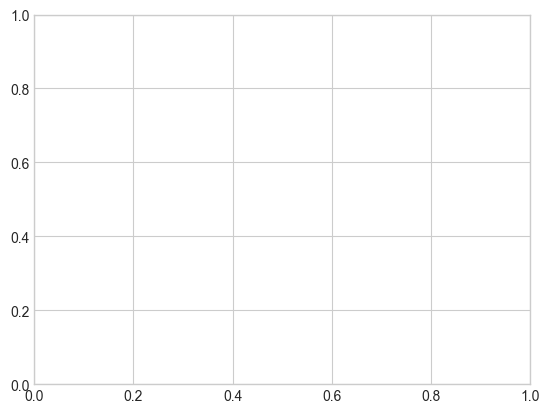

In [33]:
# save power spectrum and frequencies as arrays

power_spectrum = np.array(data_power_spectrum.postop.BIP_12.rawPsd.data)
freqs = np.array(data_power_spectrum.postop.BIP_12.frequency.data)
fig, ax = plt.subplots(1,1)

In [36]:
type(freqs)

numpy.ndarray

In [34]:
fit_model = tfr_fooof.fit_model(
    freqs=freqs,
    power_spectrum=power_spectrum,
    fit_knee=False, 
    ax=ax,
    )


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 125 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.0650, 1.6046                                          
                                                                                                  
                             


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 125 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.0650, 1.6046                                          
                                                                                                  
                             

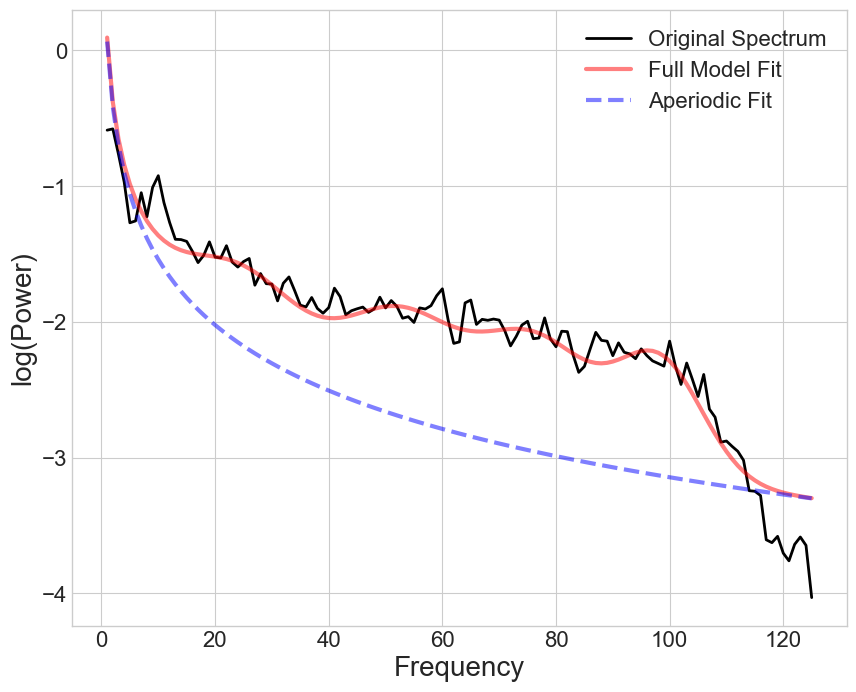

In [35]:
model = fooof.FOOOF(
        peak_width_limits=(2, 20.0),
        max_n_peaks=4,
        min_peak_height=0.0,
        peak_threshold=1.0,
        aperiodic_mode="fixed",
        verbose=True,
    )
model.fit(freqs=freqs, power_spectrum=power_spectrum)
model.print_results()
model.plot(ax=ax)

model.report()

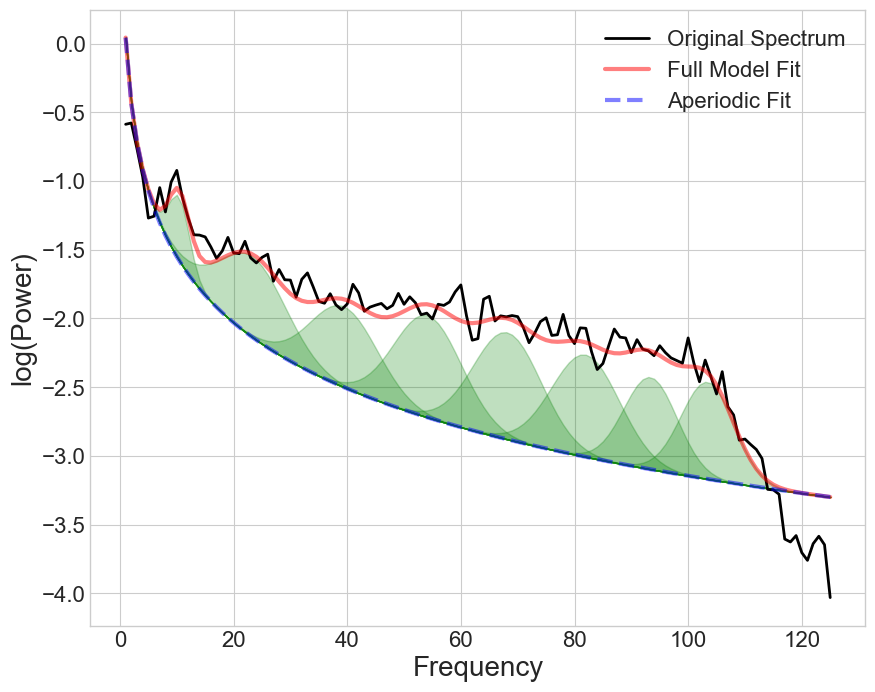

In [28]:
# Initialize power spectrum model objects and fit the power spectra

fm1 = FOOOF(min_peak_height=0.05, verbose=False)
fm2 = FOOOF(min_peak_height=0.05, aperiodic_mode='knee', verbose=False)
fm1.fit(freqs, power_spectrum)
fm2.fit(freqs, power_spectrum)

# Visualize Power Spectrum models
# Plot an example power spectrum, with a model fit
fm1.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'})



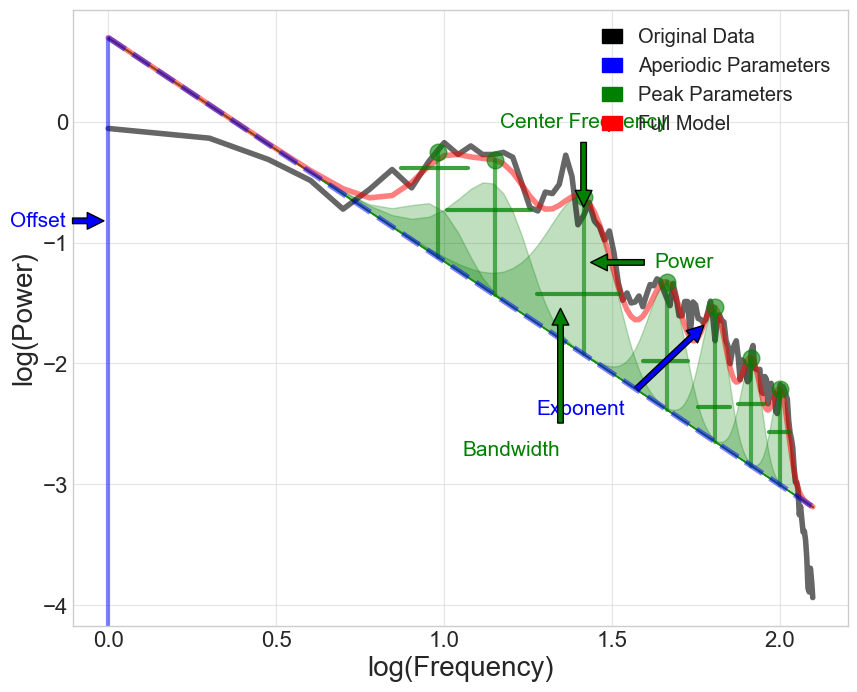

In [22]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1, plt_log=True)


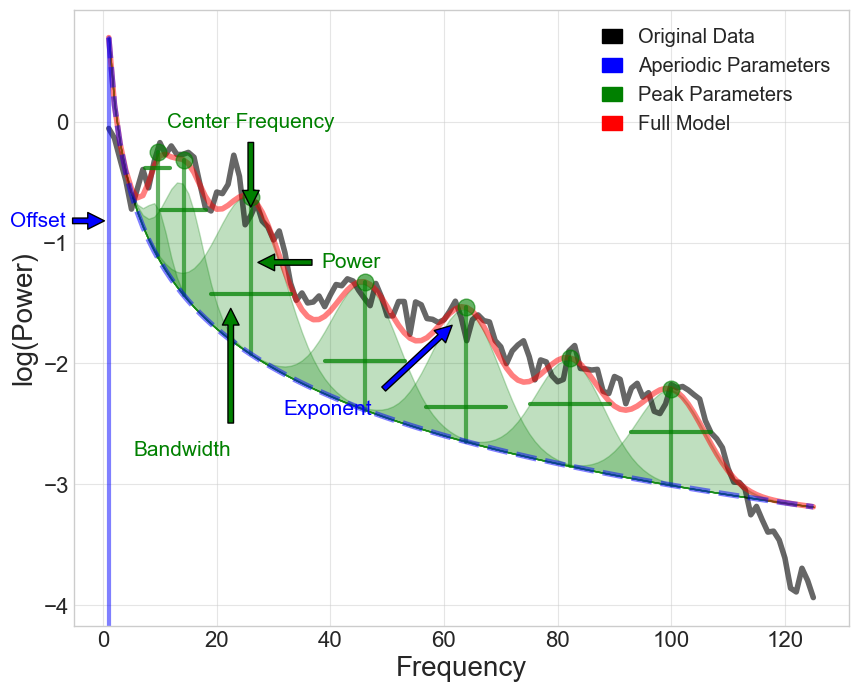

In [23]:
# plotted in log-log, here the aperiodic component is a straight line, hallmark of 1/f activity
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm1)

In [29]:
# only get the Beta Peaks

beta_peaks = fooof.analysis.get_band_peak_fm(
                    model,
                    band=(13.0, 35.0),
                    select_highest=False,
                    attribute="peak_params",
                )

# output are 3 values: CF Center frequency, Power, Bandwidth

In [32]:
center_freq = beta_peaks[0]
center_freq

25.406593134418493